Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from models.initializers import xavier_init, random_init, he_init
from models.losses import MeanSquaredError, CrossEntropyLoss
from models.activations import ReLU, Softmax, Sigmoid
from models.network import NeuralNetwork
from models.layers import DenseLayer
from load_data import load_fashion_mnist, load_mnist
from utils import one_hot_encode


Data loading

In [2]:
x_train, y_train, x_test, y_test = load_fashion_mnist()
y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

In [3]:
classifier1 = NeuralNetwork()
classifier1.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init))
classifier1.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init))
classifier1.add_layer(DenseLayer(100, 10, activation_fn=Softmax(), initializer=he_init))

classifier1.train(x_train, y_train_one_hot, epochs=10, learning_rate=0.001, loss_function=CrossEntropyLoss(),
                  batch_size=100)

classifier1.evaluate(x_test, y_test_one_hot)

Epoch: 1, Loss: 0.592
Epoch: 2, Loss: 0.410
Epoch: 3, Loss: 0.279
Epoch: 4, Loss: 0.264
Accuracy: 86.19%


In [4]:
classifier2 = NeuralNetwork()
classifier2.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init, l2_reg=0.0001))
classifier2.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init, l2_reg=0.0001))
classifier2.add_layer(DenseLayer(100, 10, activation_fn=Softmax(), initializer=he_init))

classifier2.train(x_train, y_train_one_hot, epochs=10, learning_rate=0.001, loss_function=CrossEntropyLoss(),
                  batch_size=100)

classifier2.evaluate(x_test, y_test_one_hot)

Epoch: 1, Loss: 0.369
Epoch: 2, Loss: 0.529
Epoch: 3, Loss: 0.581
Epoch: 4, Loss: 0.328
Accuracy: 84.52%


In [4]:
regularized_autoencoder = NeuralNetwork()
regularized_autoencoder.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init, l2_reg=0.0001))
regularized_autoencoder.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init, l2_reg=0.0001))
regularized_autoencoder.add_layer(DenseLayer(100, 360, activation_fn=ReLU(), initializer=he_init, l2_reg=0.0001))
regularized_autoencoder.add_layer(DenseLayer(360, 784, activation_fn=Sigmoid(), initializer=he_init))

regularized_autoencoder.train(x_train, x_train, epochs=5, learning_rate=0.5, loss_function=MeanSquaredError(),
                              batch_size=100)

Epoch: 1, Loss: 0.093
Epoch: 2, Loss: 0.093
Epoch: 3, Loss: 0.077
Epoch: 4, Loss: 0.058
Epoch: 5, Loss: 0.047


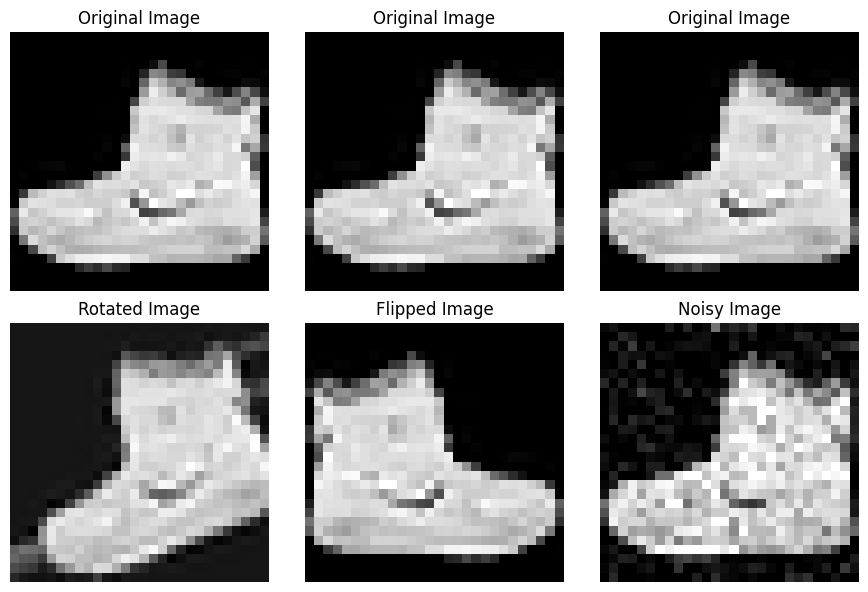

In [13]:
from utils import add_noise, flip_image, rotate_image

original_image = x_train[0]

rotated_image = rotate_image(original_image, angle=20)
flipped_image = flip_image(original_image)
noisy_image = add_noise(original_image, noise_level=0.1)

plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(rotated_image.reshape(28, 28), cmap='gray')
plt.title("Rotated Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(flipped_image.reshape(28, 28), cmap='gray')
plt.title("Flipped Image")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(noisy_image.reshape(28, 28), cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
super_simple_classifier = NeuralNetwork()
super_simple_classifier.add_layer(DenseLayer(784, 100, activation_fn=ReLU(), initializer=he_init))
super_simple_classifier.add_layer(DenseLayer(100, 10, activation_fn=Softmax(), initializer=he_init))

super_simple_classifier.train(x_train, y_train_one_hot, epochs=3, learning_rate=0.001,
                              loss_function=CrossEntropyLoss(),
                              batch_size=100)

super_simple_classifier.evaluate(x_test, y_test_one_hot)

Epoch: 1, Loss: 0.649
Epoch: 2, Loss: 0.363
Epoch: 3, Loss: 0.377
Accuracy: 84.88%


In [8]:
from utils import save_model, load_model

save_model(super_simple_classifier, "trained_models/super_simple_classifier.pkl")

In [3]:
from utils import load_model

loaded_model = load_model("trained_models/super_simple_classifier.pkl")

loaded_model.evaluate(x_test, y_test_one_hot)

Accuracy: 84.88%
